In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
insurance_dataset = pd.read_csv("insurance.csv")

In [4]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_dataset.shape

(1338, 7)

In [6]:
insurance_dataset.describe()       # statistical measures

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
insurance_dataset.info()       # categorical feature :    sex , smoker, region

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
#checkin for missiing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data analysis

C:\Users\tejas\AppData\Local\Temp\ipykernel_16136\3621371163.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


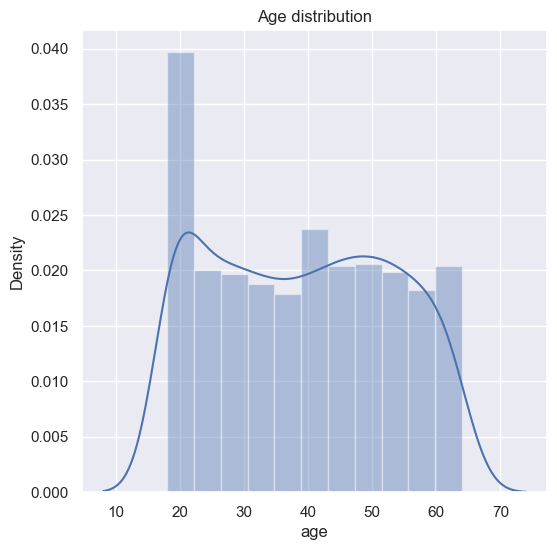

In [9]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age distribution')
plt.show()

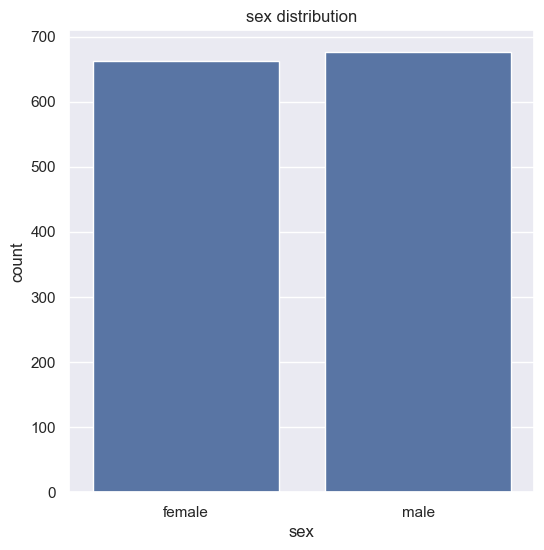

In [10]:
#gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('sex distribution')
plt.show()

In [11]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\tejas\AppData\Local\Temp\ipykernel_16136\3913338747.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


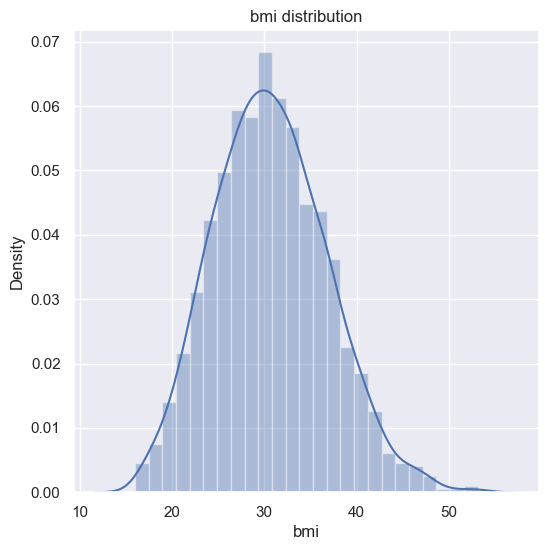

In [12]:
# distribution of bmi distributiom             #normal bmi range is 18.5 to 24.9
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('bmi distribution')
plt.show()

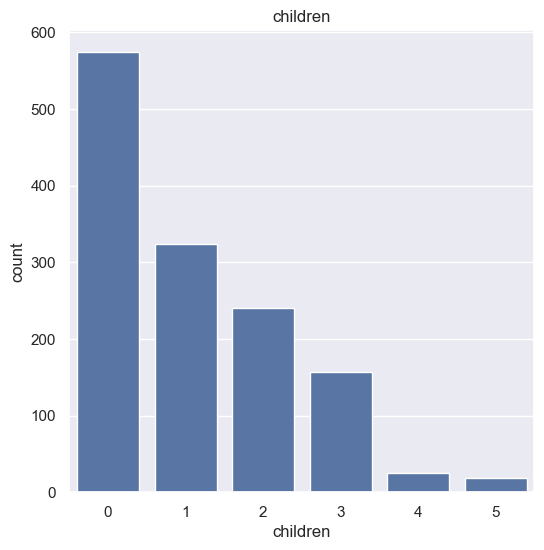

In [13]:
#children
plt.figure(figsize=(6,6))
sns.countplot(x='children', data = insurance_dataset)
plt.title('children')
plt.show()

In [14]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

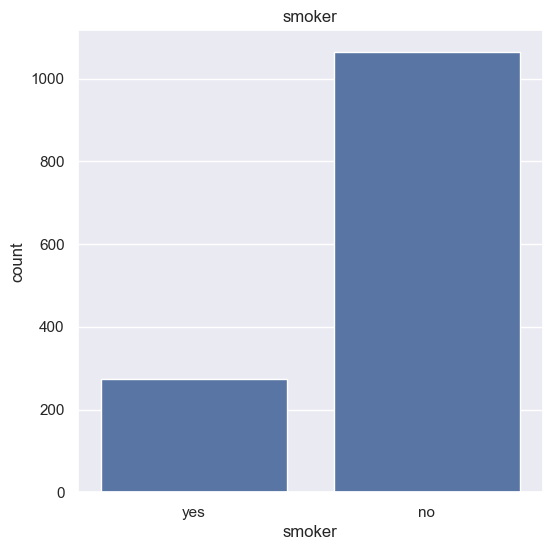

In [15]:
#smoker
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data = insurance_dataset)
plt.title('smoker')
plt.show()

In [16]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

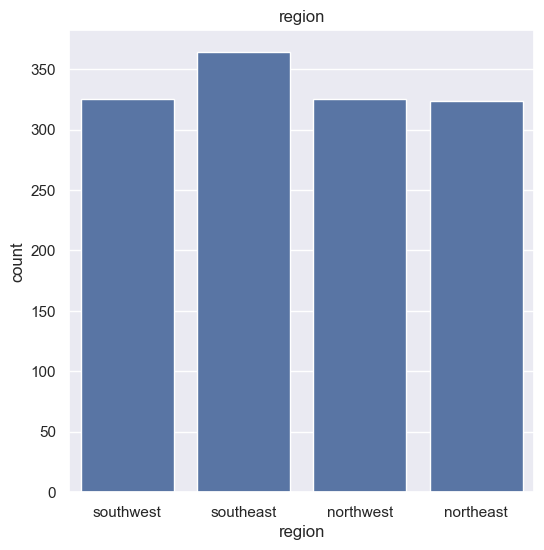

In [17]:
#region
plt.figure(figsize=(6,6))
sns.countplot(x='region', data = insurance_dataset)
plt.title('region')
plt.show()

In [18]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\tejas\AppData\Local\Temp\ipykernel_16136\3575869118.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


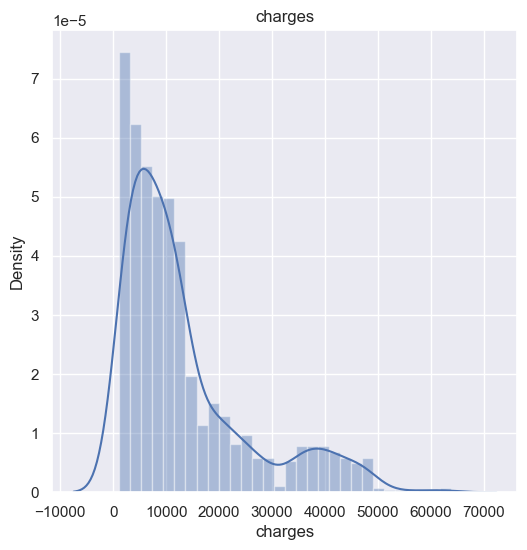

In [19]:
# distribution of charges
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('charges')
plt.show()

data preprocessing

In [20]:
#encodijg categorical features
#encoding sex column
insurance_dataset.replace({'sex':{'male':0, 'female': 1}}, inplace= True)

#encoding SMOKER coloumn
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace =True)

#encoding region column
insurance_dataset.replace({'region':{'southeast': 0, 'southwest' :1, 'northeast':2, 'northwest':3}}, inplace = True)


C:\Users\tejas\AppData\Local\Temp\ipykernel_16136\1027292017.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0, 'female': 1}}, inplace= True)
C:\Users\tejas\AppData\Local\Temp\ipykernel_16136\1027292017.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace =True)
C:\Users\tejas\AppData\Local\Temp\ipykernel_16136\1027292017.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future ver

Splitting the features and target

In [21]:
X = insurance_dataset.drop(columns="charges", axis=1)
Y= insurance_dataset['charges']

In [22]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [23]:
print(X
      )

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


splitting the data into Training data and testing data

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size=0.2, random_state=3)

In [49]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model training


linear regression

In [76]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10,random_state=2)


In [77]:
regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=2)

MOdel evaluation

In [78]:
#prediction on traning data
training_data_prediction = regressor.predict(X_train)

In [79]:
#R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print("R square value : ", r2_train)

R square value :  0.9669968744878286


In [80]:
#prediction on test data
y_predict = regressor.predict(X_test)

# r square valur


r2_test = metrics.r2_score(Y_test, y_predict)
print("R squared value : ", r2_test)

R squared value :  0.8456336193611211


Building a predictive system

In [81]:
def insu():
    age = int(input("enter your age: "))
    sex = input("Enter your gender (male/female): ").strip().lower()
    if sex == "male":
        sex = 0
    elif sex == "female":
        sex = 1
    else:
        print("Invalid input for gender.")
        return None  
    bmi = float(input("enter you bgmi"))

    children = input("Do you have children:  ").strip().lower()
    if children =="yes":
        children = 1
    else:
        children =0

    smoker = input("Do you smoke:  ").strip().lower()
    if smoker =="yes":
        smoker = 0
    elif smoker == "no":
        smoker =1
    else:
        print("Invalid input for gender.")
        return None 
    
    region = input("where do you belong from  (southeast, southwest, northeast, northwest):  ").strip().lower()
    if region =="southeast":
        region = 0
    elif  region == "southwest":
        region =1
    elif region == "northeast":
        region = 2
    elif region == "northwest":
        region =3
    else:
        print("Invalid input for gender.")
        return None 
    

    features  = [[age, sex, bmi, children, smoker, region ]]

    prediction = regressor.predict(features)

    print("Your health insurance values is Rs.", prediction * 84)

insu()


Your health insurance values is Rs. [2196566.56842]


C:\Users\tejas\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [60]:
import pickle

In [61]:
pickle.dump(regressor, open("model.pkl","wb"))